# Crypto currency analysis

1. Import Libraries and Load Datasets

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the datasets
bitcoin_df = pd.read_csv(r'C:\Users\Vishnu\Downloads\coin_Bitcoin.csv')
ethereum_df = pd.read_csv(r'C:\Users\Vishnu\Downloads\coin_Ethereum.csv')
binancecoin_df = pd.read_csv(r'C:\Users\Vishnu\Downloads\coin_BinanceCoin.csv')

# Display the first few rows of each dataset to understand their structure
print("Bitcoin Dataset:")
print(bitcoin_df.head())
print("\nEthereum Dataset:")
print(ethereum_df.head())
print("\nBinance Coin Dataset:")
print(binancecoin_df.head())




Bitcoin Dataset:
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  

Ethereum Dataset:
   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2  

2. Initial Exploration of the Datasets

In [6]:
# Check for missing values in each dataset
print("Missing values in Bitcoin dataset:", bitcoin_df.isnull().sum())
print("Missing values in Ethereum dataset:", ethereum_df.isnull().sum())
print("Missing values in Binance Coin dataset:", binancecoin_df.isnull().sum())


Missing values in Bitcoin dataset: SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Missing values in Ethereum dataset: SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Missing values in Binance Coin dataset: SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [7]:

# Display summary statistics
print("Bitcoin Dataset Statistics:\n", bitcoin_df.describe())
print("\nEthereum Dataset Statistics:\n", ethereum_df.describe())
print("\nBinance Coin Dataset Statistics:\n", binancecoin_df.describe())


Bitcoin Dataset Statistics:
                SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e

3. Data Preprocessing: Handling Date Columns

In [9]:
import pandas as pd

# Convert date columns to datetime format
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], errors='coerce')
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], errors='coerce')
binancecoin_df['Date'] = pd.to_datetime(binancecoin_df['Date'], errors='coerce')

# Drop any rows with missing dates
bitcoin_df = bitcoin_df.dropna(subset=['Date'])
ethereum_df = ethereum_df.dropna(subset=['Date'])
binancecoin_df = binancecoin_df.dropna(subset=['Date'])

# Sort each dataset by date
bitcoin_df = bitcoin_df.sort_values(by='Date')
ethereum_df = ethereum_df.sort_values(by='Date')
binancecoin_df = binancecoin_df.sort_values(by='Date')

# Set 'Date' column as the index and convert to datetime
bitcoin_df.set_index('Date', inplace=True)
ethereum_df.set_index('Date', inplace=True)
binancecoin_df.set_index('Date', inplace=True)

# Ensure the index is in datetime format and set daily frequency
bitcoin_df.index = pd.to_datetime(bitcoin_df.index, errors='coerce')
ethereum_df.index = pd.to_datetime(ethereum_df.index, errors='coerce')
binancecoin_df.index = pd.to_datetime(binancecoin_df.index, errors='coerce')

# Set the frequency to daily ('D')
bitcoin_df = bitcoin_df.asfreq('D')  # Set daily frequency
ethereum_df = ethereum_df.asfreq('D')
binancecoin_df = binancecoin_df.asfreq('D')


4. Exploratory data analysis & Feature Engineering

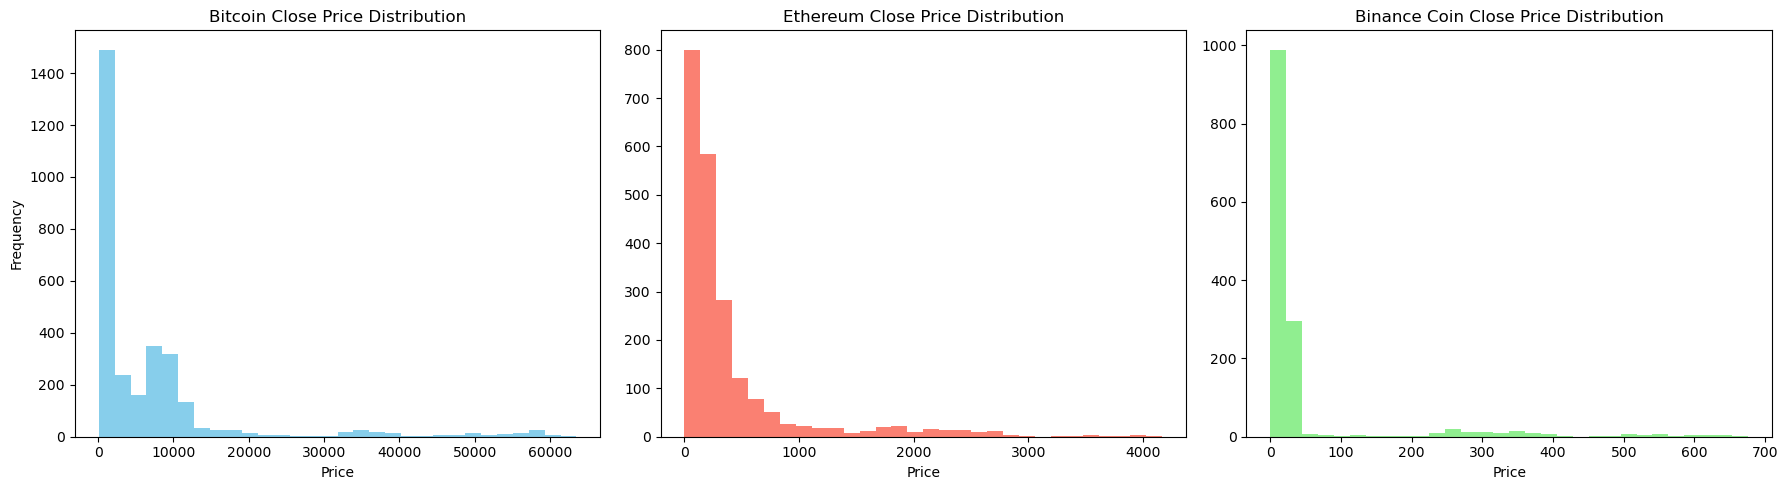

In [11]:
# Plot histograms of closing prices
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(bitcoin_df['Close'], bins=30, color='skyblue')
plt.title("Bitcoin Close Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(ethereum_df['Close'], bins=30, color='salmon')
plt.title("Ethereum Close Price Distribution")
plt.xlabel("Price")

plt.subplot(1, 3, 3)
plt.hist(binancecoin_df['Close'], bins=30, color='lightgreen')
plt.title("Binance Coin Close Price Distribution")
plt.xlabel("Price")

plt.tight_layout()
plt.show()


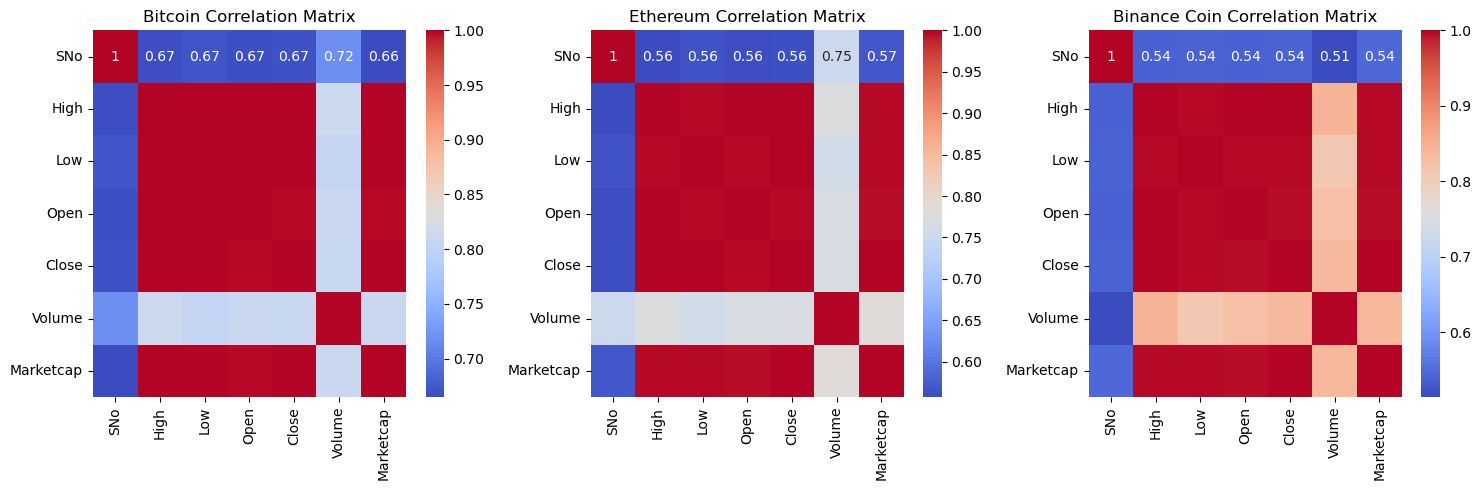

In [12]:
# Correlation matrix for each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Select only numeric columns for Bitcoin dataset
bitcoin_corr = bitcoin_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(bitcoin_corr, annot=True, cmap='coolwarm')
plt.title("Bitcoin Correlation Matrix")

plt.subplot(1, 3, 2)
# Select only numeric columns for Ethereum dataset
ethereum_corr = ethereum_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(ethereum_corr, annot=True, cmap='coolwarm')
plt.title("Ethereum Correlation Matrix")

plt.subplot(1, 3, 3)
# Select only numeric columns for Binance Coin dataset
binancecoin_corr = binancecoin_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(binancecoin_corr, annot=True, cmap='coolwarm')
plt.title("Binance Coin Correlation Matrix")

plt.tight_layout()
plt.show()


In [14]:
# Calculate Daily Returns and Moving Averages
for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    df['Daily_Return'] = df['Close'].pct_change()
    df['MA_7'] = df['Close'].rolling(window=7).mean()
    df['MA_30'] = df['Close'].rolling(window=30).mean()
    df['MA_90'] = df['Close'].rolling(window=90).mean()


In [15]:
# Volatility and Price Range Features
for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    # Daily Price Range
    df['Price_Range'] = df['High'] - df['Low']
    
    # Log Return
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    
    # Rolling Volatility (30-day)
    df['Volatility_30d'] = df['Daily_Return'].rolling(window=30).std()

# Momentum Indicators
def compute_rsi(series, window=14):
    """Calculate the Relative Strength Index (RSI)."""
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    # Relative Strength Index (RSI)
    df['RSI_14'] = compute_rsi(df['Close'], window=14)
    
    # Exponential Moving Averages (7-day and 21-day)
    df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
    df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()

# Volume Analysis
for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    # Volume Moving Averages
    df['Volume_MA_7'] = df['Volume'].rolling(window=7).mean()
    df['Volume_MA_30'] = df['Volume'].rolling(window=30).mean()
    
    # Volume-Weighted Average Price (VWAP)
    df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()


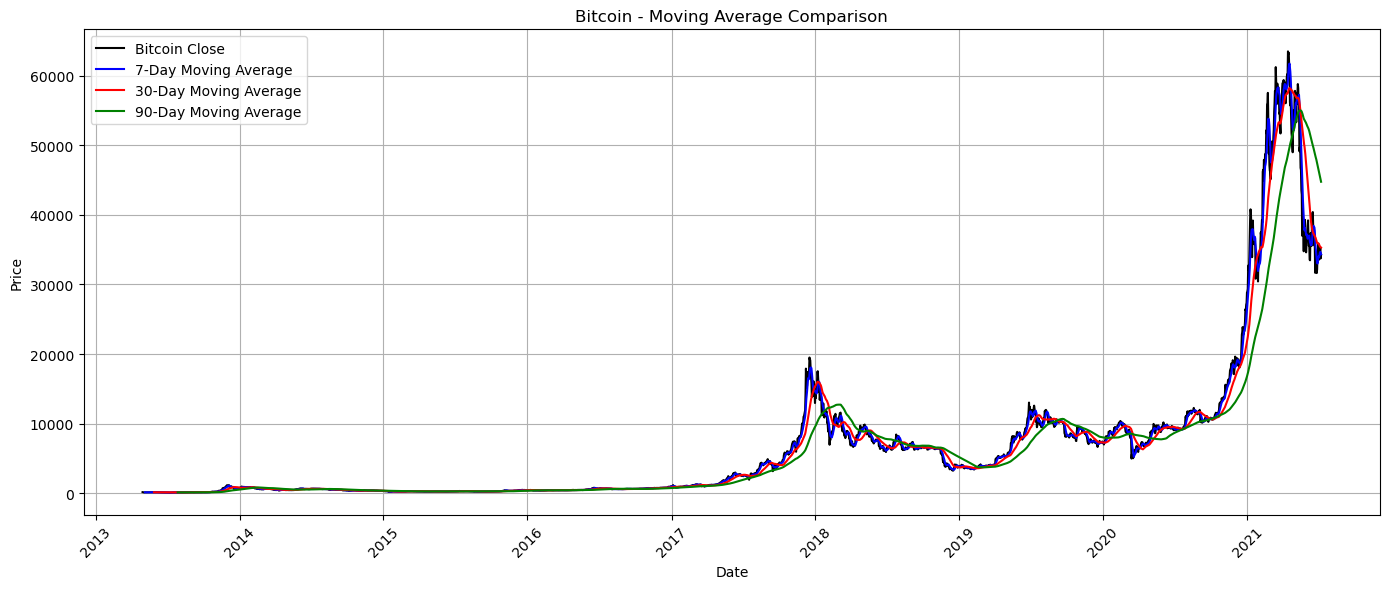

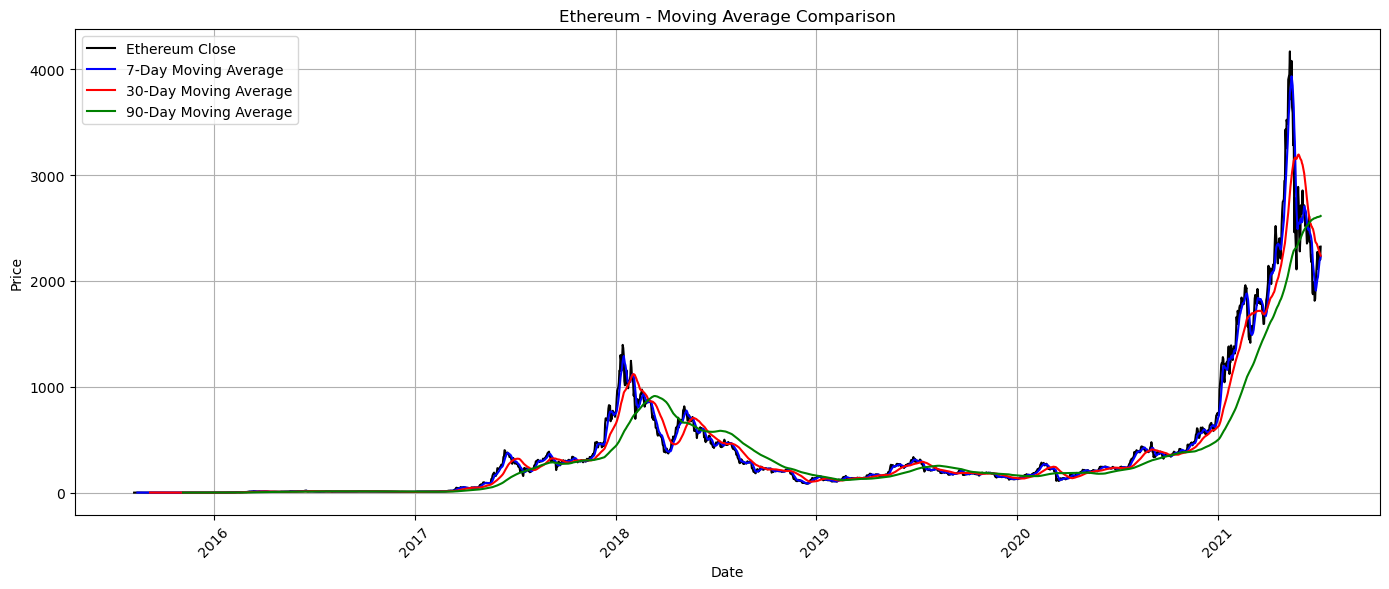

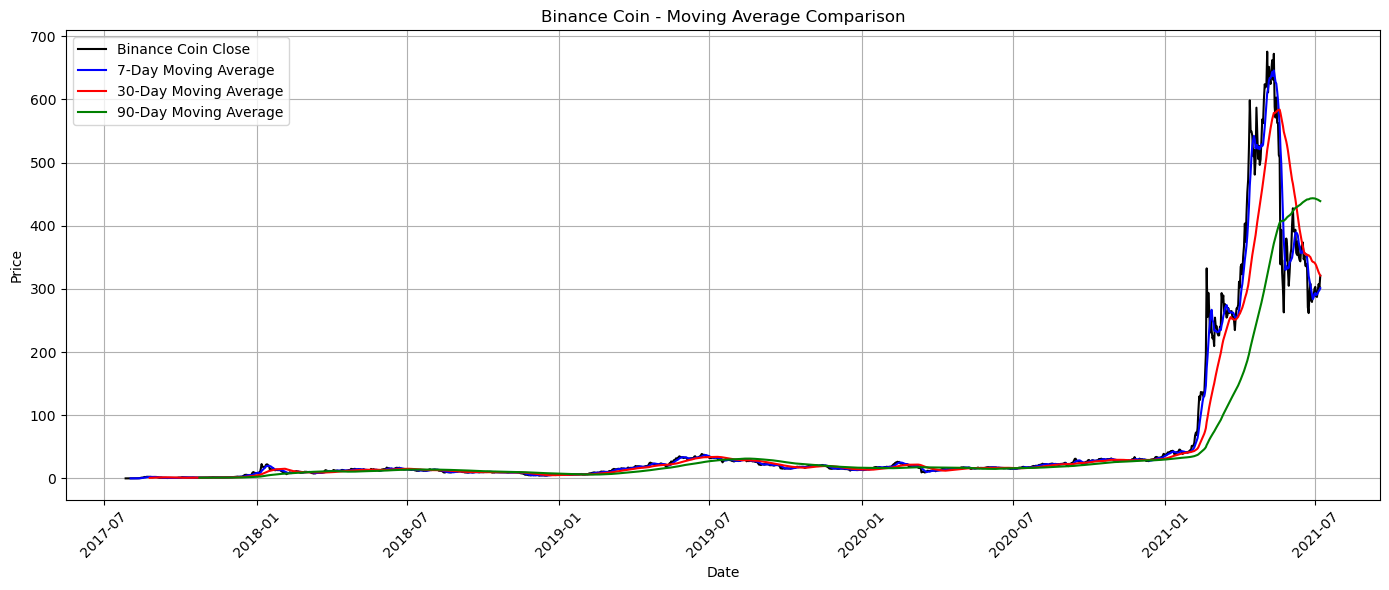

In [16]:
import matplotlib.pyplot as plt

# Plot moving averages for Bitcoin
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin Close', color='black')
plt.plot(bitcoin_df.index, bitcoin_df['MA_7'], label='7-Day Moving Average', color='blue')
plt.plot(bitcoin_df.index, bitcoin_df['MA_30'], label='30-Day Moving Average', color='red')
plt.plot(bitcoin_df.index, bitcoin_df['MA_90'], label='90-Day Moving Average', color='green')
plt.title("Bitcoin - Moving Average Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot moving averages for Ethereum
plt.figure(figsize=(14, 6))
plt.plot(ethereum_df.index, ethereum_df['Close'], label='Ethereum Close', color='black')
plt.plot(ethereum_df.index, ethereum_df['MA_7'], label='7-Day Moving Average', color='blue')
plt.plot(ethereum_df.index, ethereum_df['MA_30'], label='30-Day Moving Average', color='red')
plt.plot(ethereum_df.index, ethereum_df['MA_90'], label='90-Day Moving Average', color='green')
plt.title("Ethereum - Moving Average Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot moving averages for Binance Coin
plt.figure(figsize=(14, 6))
plt.plot(binancecoin_df.index, binancecoin_df['Close'], label='Binance Coin Close', color='black')
plt.plot(binancecoin_df.index, binancecoin_df['MA_7'], label='7-Day Moving Average', color='blue')
plt.plot(binancecoin_df.index, binancecoin_df['MA_30'], label='30-Day Moving Average', color='red')
plt.plot(binancecoin_df.index, binancecoin_df['MA_90'], label='90-Day Moving Average', color='green')
plt.title("Binance Coin - Moving Average Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


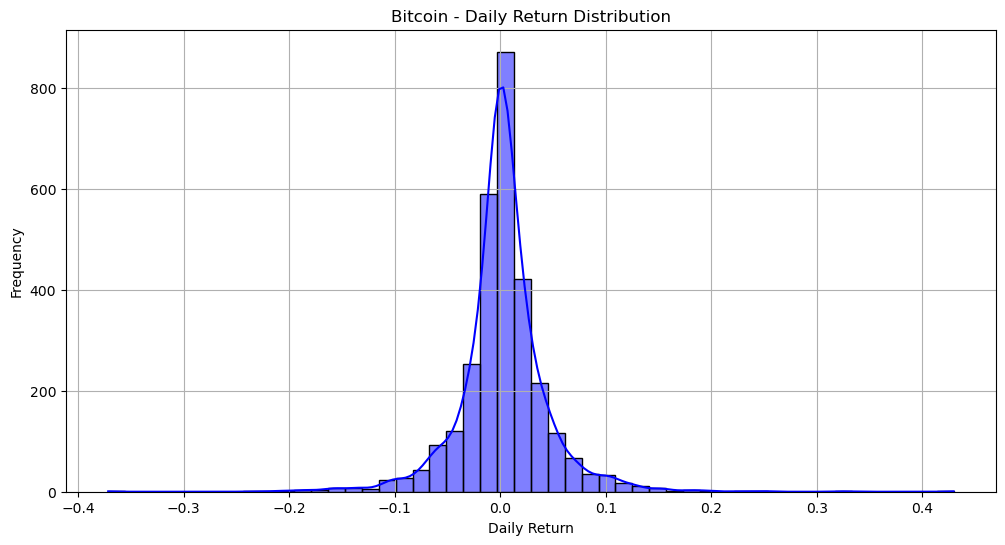

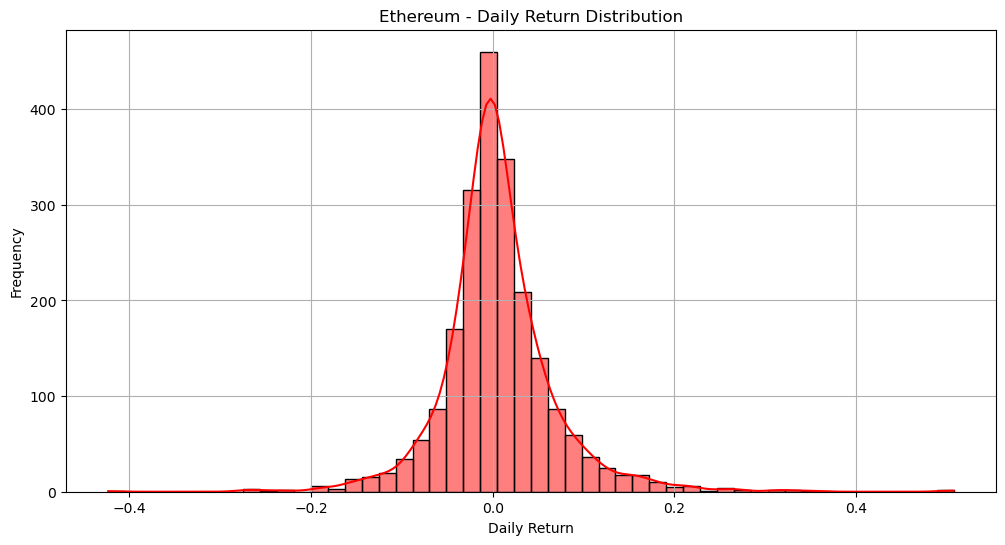

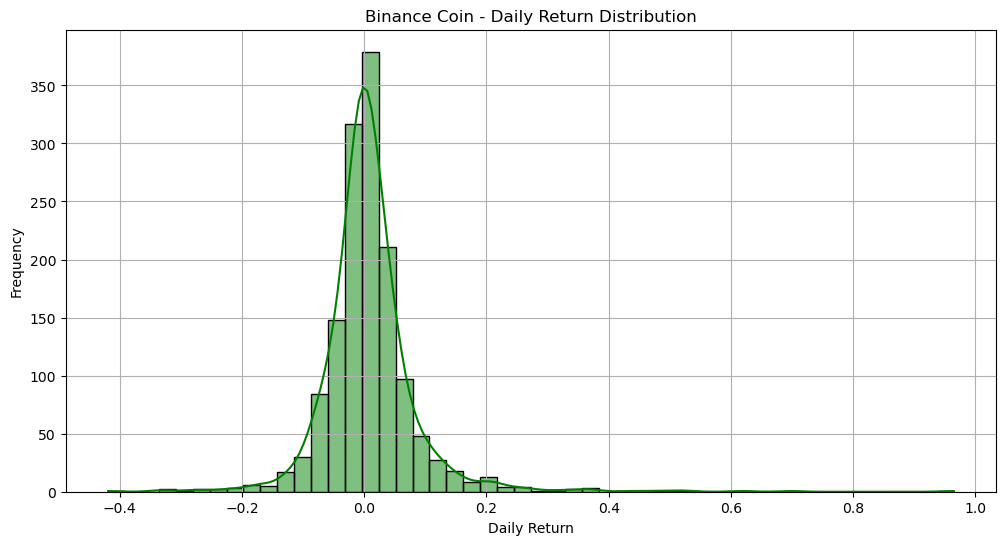

In [17]:
import warnings

# Suppress FutureWarning from Seaborn about 'use_inf_as_na' deprecation
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN for each DataFrame
bitcoin_df['Daily_Return'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)
ethereum_df['Daily_Return'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)
binancecoin_df['Daily_Return'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Plot distribution of daily returns for Bitcoin
plt.figure(figsize=(12, 6))
sns.histplot(bitcoin_df['Daily_Return'], bins=50, kde=True, color='blue')
plt.title("Bitcoin - Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot distribution of daily returns for Ethereum
plt.figure(figsize=(12, 6))
sns.histplot(ethereum_df['Daily_Return'], bins=50, kde=True, color='red')
plt.title("Ethereum - Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot distribution of daily returns for Binance Coin
plt.figure(figsize=(12, 6))
sns.histplot(binancecoin_df['Daily_Return'], bins=50, kde=True, color='green')
plt.title("Binance Coin - Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


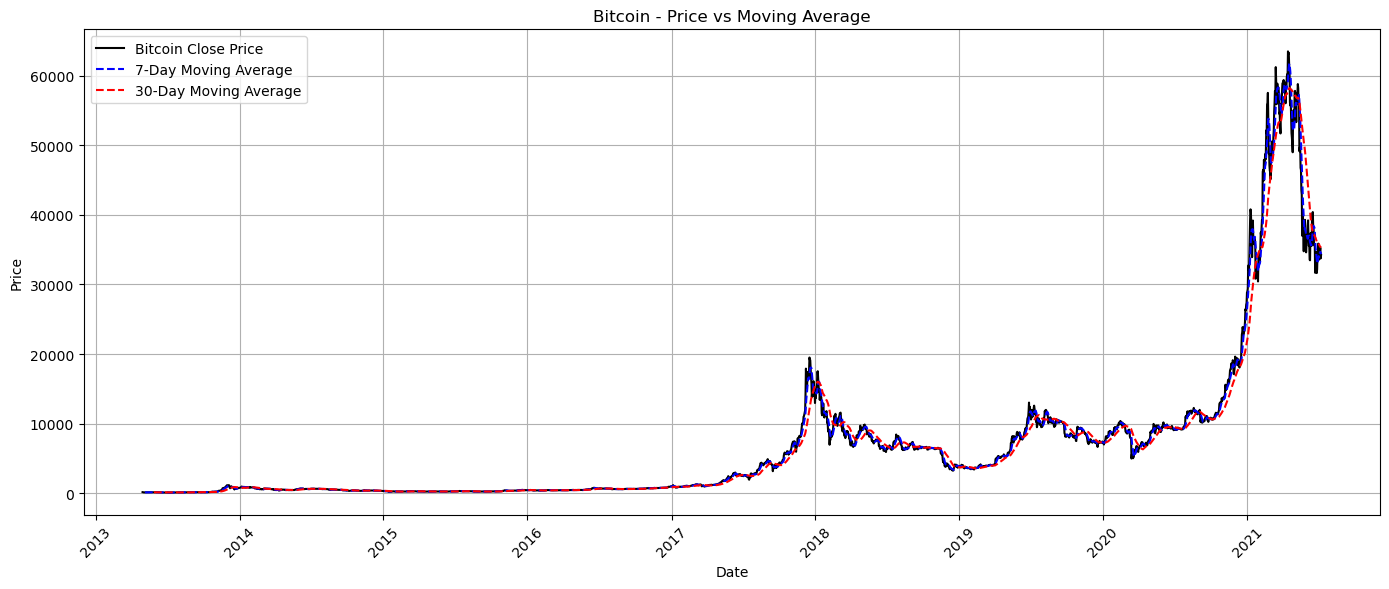

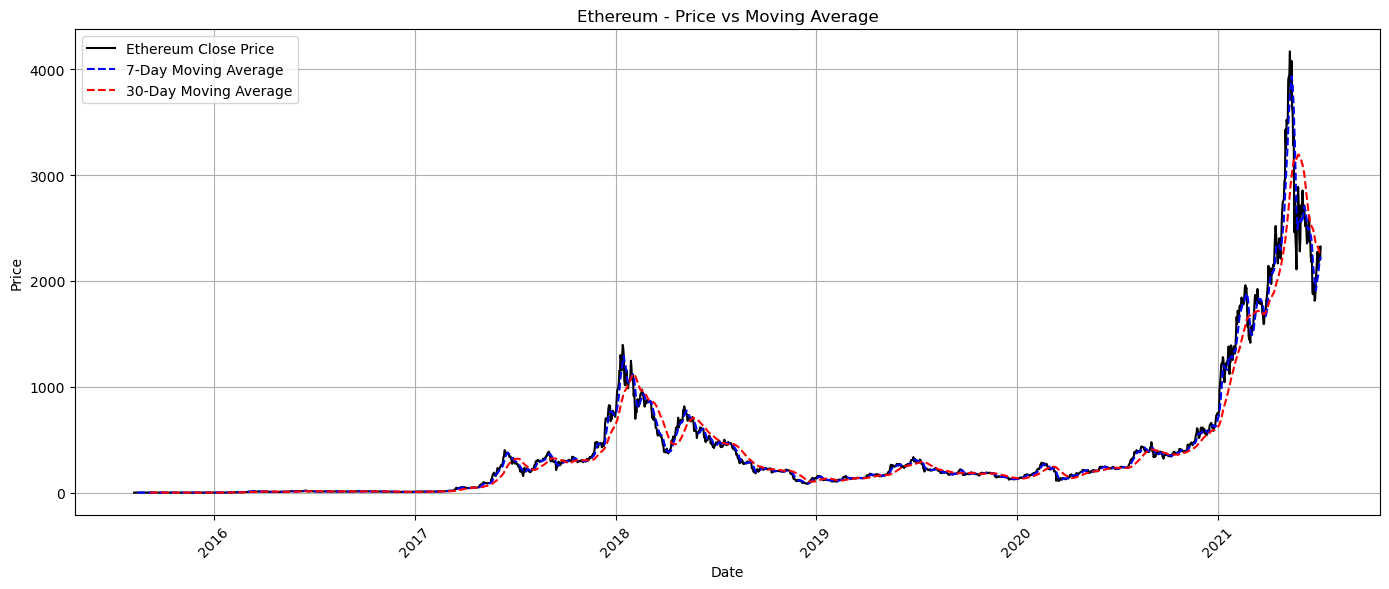

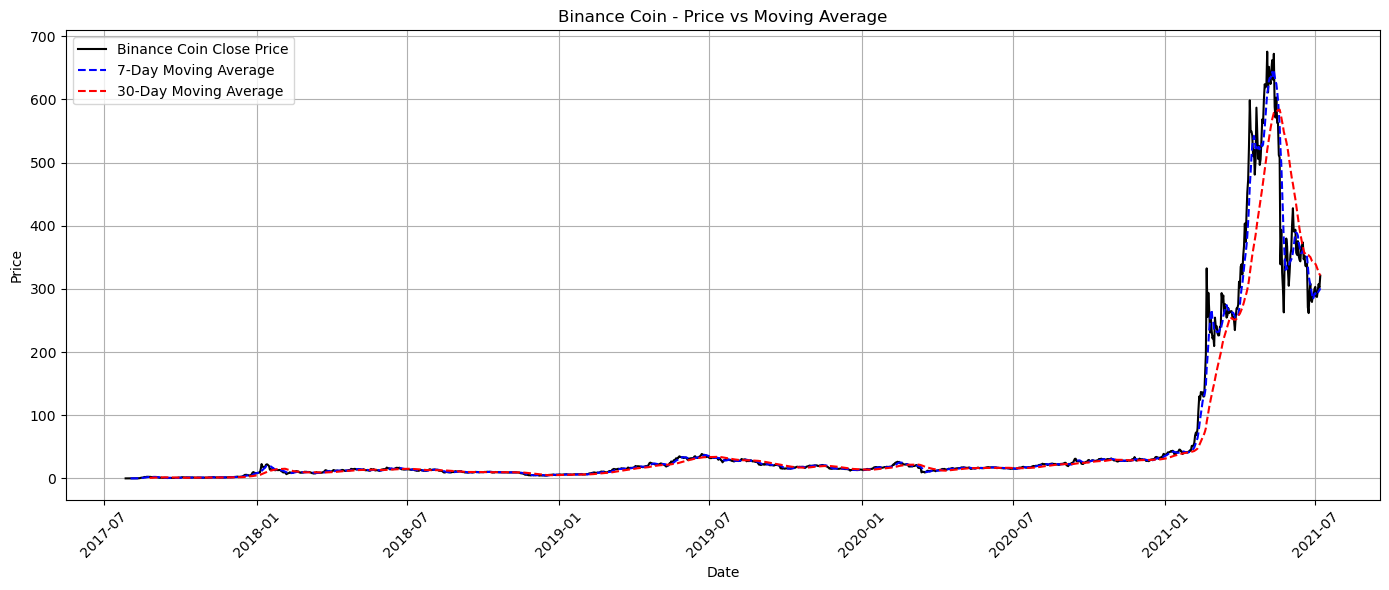

In [18]:
import matplotlib.pyplot as plt

# Plot Price vs Moving Average for Bitcoin
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Close'], label='Bitcoin Close Price', color='black')
plt.plot(bitcoin_df.index, bitcoin_df['MA_7'], label='7-Day Moving Average', color='blue', linestyle='--')
plt.plot(bitcoin_df.index, bitcoin_df['MA_30'], label='30-Day Moving Average', color='red', linestyle='--')
plt.title("Bitcoin - Price vs Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Price vs Moving Average for Ethereum
plt.figure(figsize=(14, 6))
plt.plot(ethereum_df.index, ethereum_df['Close'], label='Ethereum Close Price', color='black')
plt.plot(ethereum_df.index, ethereum_df['MA_7'], label='7-Day Moving Average', color='blue', linestyle='--')
plt.plot(ethereum_df.index, ethereum_df['MA_30'], label='30-Day Moving Average', color='red', linestyle='--')
plt.title("Ethereum - Price vs Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Price vs Moving Average for Binance Coin
plt.figure(figsize=(14, 6))
plt.plot(binancecoin_df.index, binancecoin_df['Close'], label='Binance Coin Close Price', color='black')
plt.plot(binancecoin_df.index, binancecoin_df['MA_7'], label='7-Day Moving Average', color='blue', linestyle='--')
plt.plot(binancecoin_df.index, binancecoin_df['MA_30'], label='30-Day Moving Average', color='red', linestyle='--')
plt.title("Binance Coin - Price vs Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


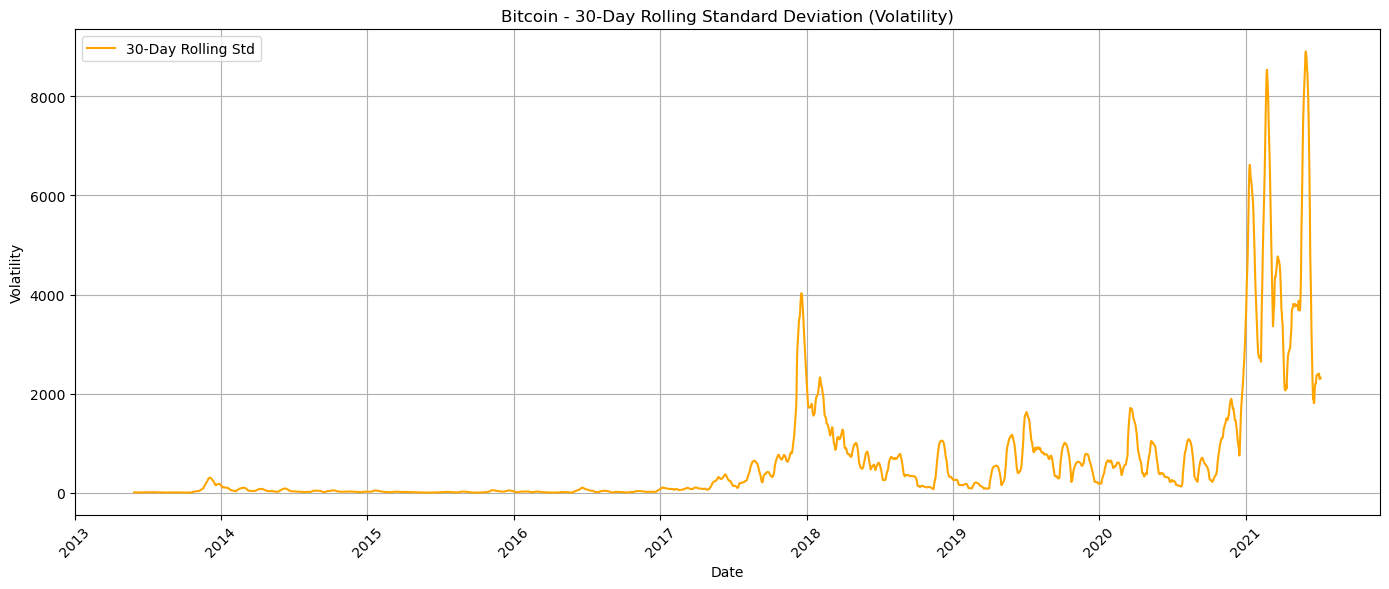

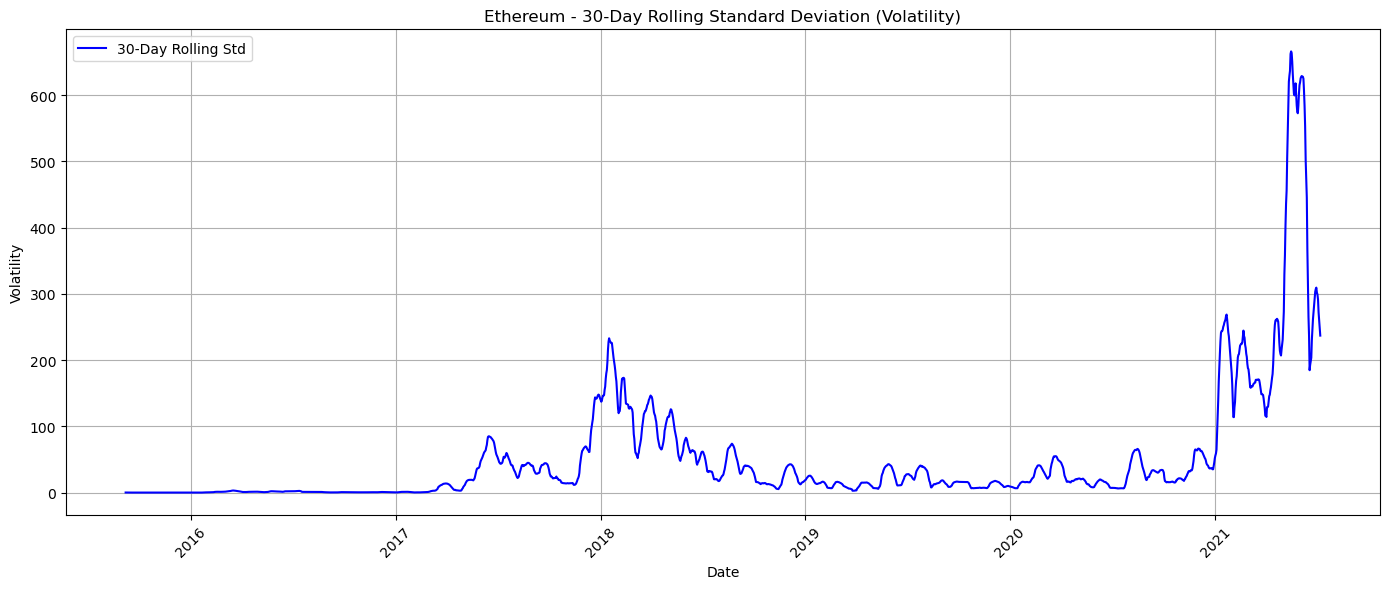

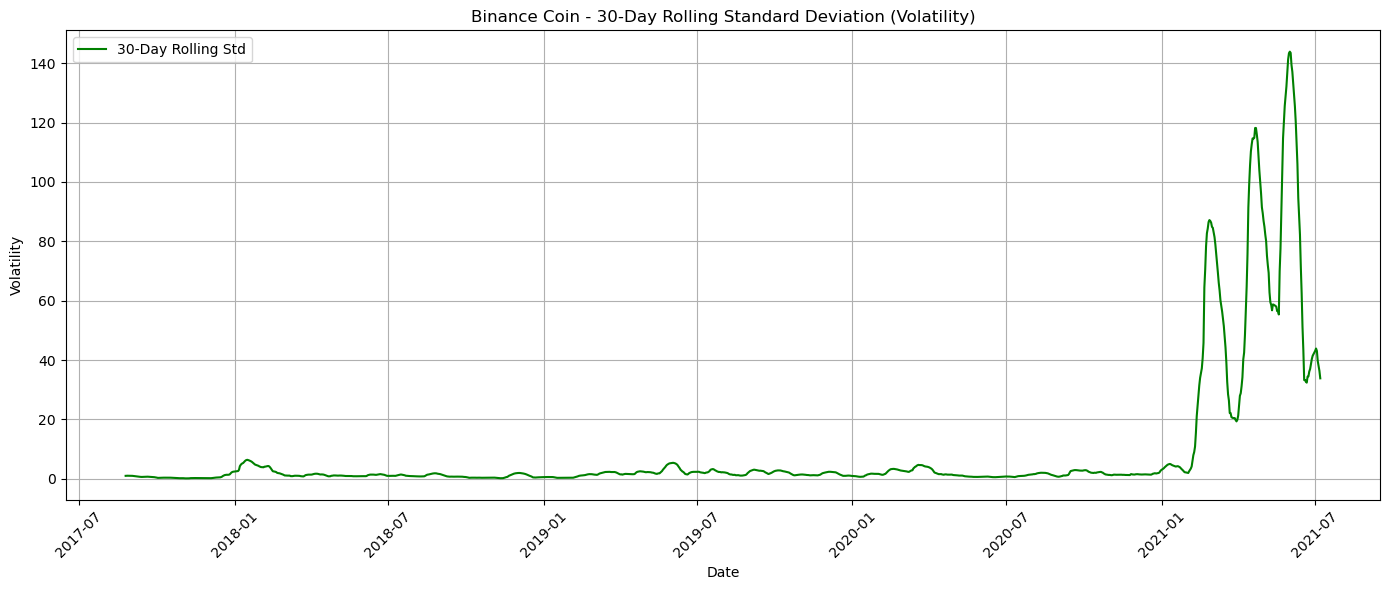

In [19]:
import matplotlib.pyplot as plt

# Calculate Rolling Standard Deviation (Volatility)
for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()

# Plot Rolling Standard Deviation for Bitcoin
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Rolling_Std'], label='30-Day Rolling Std', color='orange')
plt.title("Bitcoin - 30-Day Rolling Standard Deviation (Volatility)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Rolling Standard Deviation for Ethereum
plt.figure(figsize=(14, 6))
plt.plot(ethereum_df.index, ethereum_df['Rolling_Std'], label='30-Day Rolling Std', color='blue')
plt.title("Ethereum - 30-Day Rolling Standard Deviation (Volatility)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Rolling Standard Deviation for Binance Coin
plt.figure(figsize=(14, 6))
plt.plot(binancecoin_df.index, binancecoin_df['Rolling_Std'], label='30-Day Rolling Std', color='green')
plt.title("Binance Coin - 30-Day Rolling Standard Deviation (Volatility)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


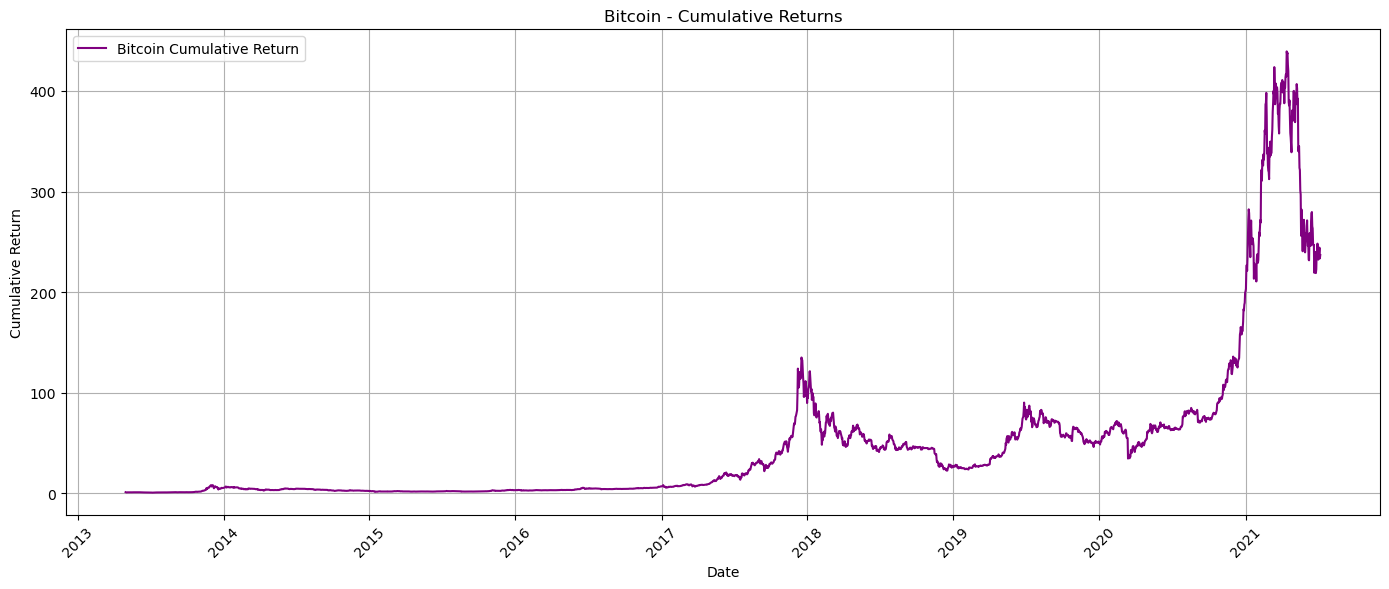

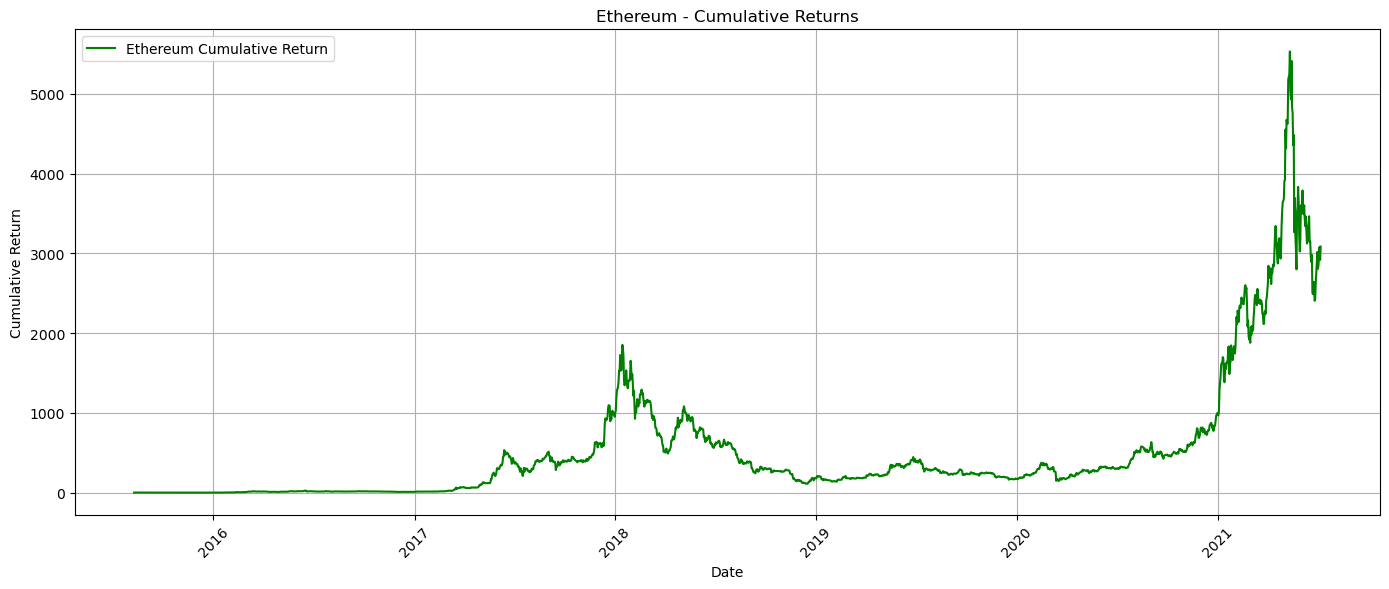

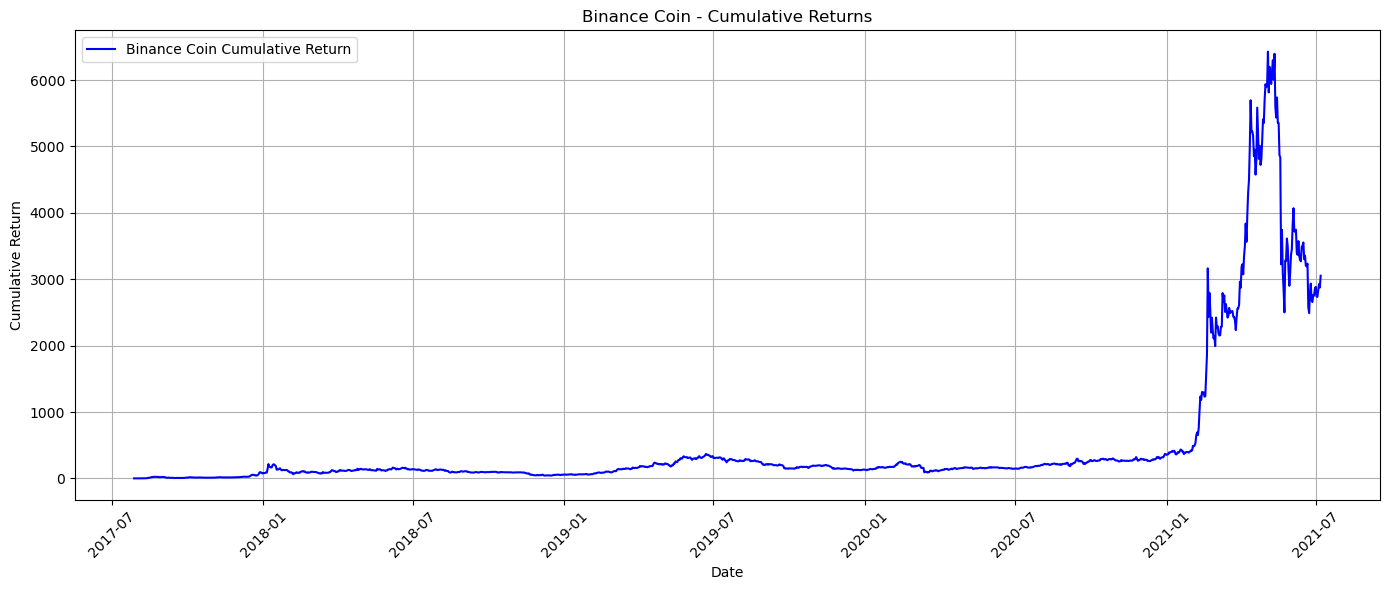

In [20]:
# Calculate Cumulative Returns
for df in [bitcoin_df, ethereum_df, binancecoin_df]:
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

# Plot Cumulative Returns for Bitcoin
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_df.index, bitcoin_df['Cumulative_Return'], label='Bitcoin Cumulative Return', color='purple')
plt.title("Bitcoin - Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Cumulative Returns for Ethereum
plt.figure(figsize=(14, 6))
plt.plot(ethereum_df.index, ethereum_df['Cumulative_Return'], label='Ethereum Cumulative Return', color='green')
plt.title("Ethereum - Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Cumulative Returns for Binance Coin
plt.figure(figsize=(14, 6))
plt.plot(binancecoin_df.index, binancecoin_df['Cumulative_Return'], label='Binance Coin Cumulative Return', color='blue')
plt.title("Binance Coin - Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
bitcoin_df,ethereum_df,binancecoin_df

(                      SNo     Name Symbol          High           Low  \
 Date                                                                    
 2013-04-29 23:59:59     1  Bitcoin    BTC    147.488007    134.000000   
 2013-04-30 23:59:59     2  Bitcoin    BTC    146.929993    134.050003   
 2013-05-01 23:59:59     3  Bitcoin    BTC    139.889999    107.720001   
 2013-05-02 23:59:59     4  Bitcoin    BTC    125.599998     92.281898   
 2013-05-03 23:59:59     5  Bitcoin    BTC    108.127998     79.099998   
 ...                   ...      ...    ...           ...           ...   
 2021-07-02 23:59:59  2987  Bitcoin    BTC  33939.588699  32770.680780   
 2021-07-03 23:59:59  2988  Bitcoin    BTC  34909.259899  33402.696536   
 2021-07-04 23:59:59  2989  Bitcoin    BTC  35937.567147  34396.477458   
 2021-07-05 23:59:59  2990  Bitcoin    BTC  35284.344430  33213.661034   
 2021-07-06 23:59:59  2991  Bitcoin    BTC  35038.536363  33599.916169   
 
                              Open  

In [22]:


# Drop rows with missing values in the Bitcoin dataset
bitcoin_df_cleaned = bitcoin_df.dropna()

# Drop rows with missing values in the Ethereum dataset
ethereum_df_cleaned = ethereum_df.dropna()

# Drop rows with missing values in the Binance Coin dataset
binancecoin_df_cleaned = binancecoin_df.dropna()

# Optional: Print the shape of the cleaned datasets to see the reduction in size
print("Cleaned Bitcoin DataFrame shape:", bitcoin_df_cleaned.shape)
print("Cleaned Ethereum DataFrame shape:", ethereum_df_cleaned.shape)
print("Cleaned Binance Coin DataFrame shape:", binancecoin_df_cleaned.shape)


Cleaned Bitcoin DataFrame shape: (2749, 24)
Cleaned Ethereum DataFrame shape: (2071, 24)
Cleaned Binance Coin DataFrame shape: (1353, 24)


In [23]:
# Remove the SNo column
bitcoin_df_cleaned = bitcoin_df_cleaned.drop(columns=['SNo'])

# reset the index after dropping the column
bitcoin_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(bitcoin_df_cleaned.head())

# Remove the SNo column
ethereum_df_cleaned = ethereum_df_cleaned.drop(columns=['SNo'])

# reset the index after dropping the column
ethereum_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(ethereum_df_cleaned.head())

# Remove the SNo column
binancecoin_df_cleaned = binancecoin_df_cleaned.drop(columns=['SNo'])

# reset the index after dropping the column
binancecoin_df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(binancecoin_df_cleaned.head())

      Name Symbol        High         Low        Open       Close      Volume  \
0  Bitcoin    BTC  777.510010  713.599976  763.280029  735.070007  46862700.0   
1  Bitcoin    BTC  747.059998  705.349976  737.979980  727.830017  32505800.0   
2  Bitcoin    BTC  748.609985  714.440002  728.049988  745.049988  19011300.0   
3  Bitcoin    BTC  766.599976  740.239990  741.349976  756.130005  20707700.0   
4  Bitcoin    BTC  760.580017  738.169983  760.320007  754.010010  20897300.0   

      Marketcap  Daily_Return        MA_7  ...  Log_Return  Volatility_30d  \
0  8.955395e+09     -0.035316  677.298567  ...   -0.035955        0.119774   
1  8.869919e+09     -0.009849  694.751430  ...   -0.009898        0.119614   
2  9.082104e+09      0.023659  713.018572  ...    0.023384        0.118209   
3  9.217168e+09      0.014872  724.835720  ...    0.014762        0.118274   
4  9.191325e+09     -0.002804  737.468576  ...   -0.002808        0.114960   

      RSI_14       EMA_7      EMA_21   Volum

In [24]:
# Merge datasets into a single DataFrame for export
merged_df = pd.concat([bitcoin_df_cleaned, ethereum_df_cleaned, binancecoin_df_cleaned])


# Export to Excel
excel_path = r'C:\Users\Vishnu\Documents\Cryptocurrency_FeaturedData.xlsx'
csv_path = r'C:\Users\Vishnu\Documents\Cryptocurrency_FeaturedData.csv'
merged_df.to_excel(excel_path, index=False)
merged_df.to_csv(csv_path, index=False)


# FORECASTING

6.ARIMA

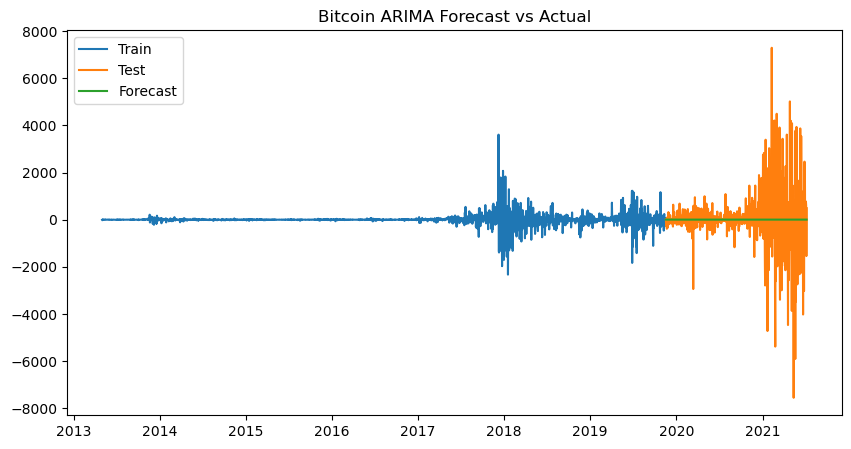

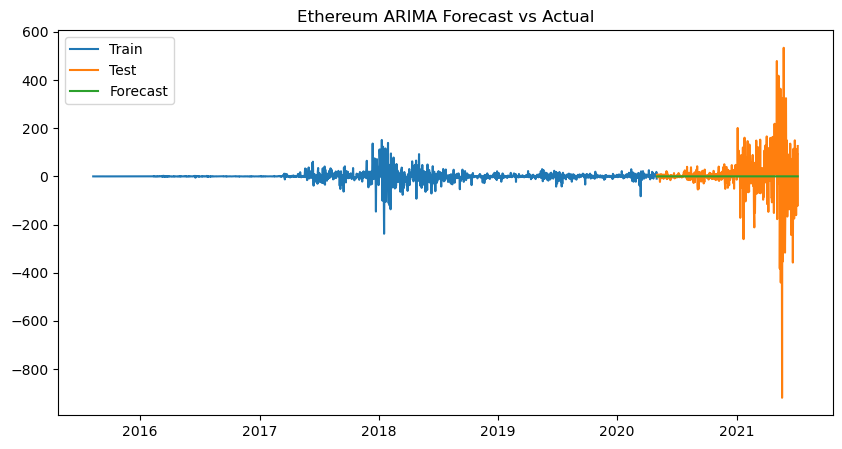

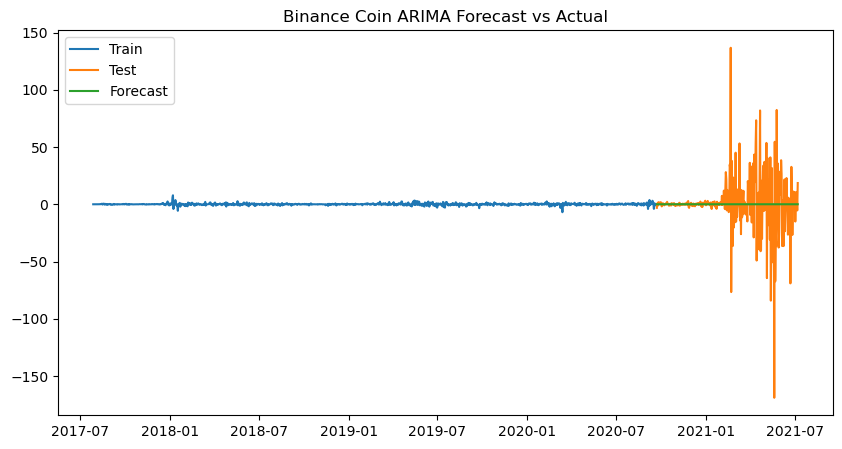

Bitcoin ARIMA RMSE: 1216.816644347628
Ethereum ARIMA RMSE: 101.42192744001841
Binance Coin ARIMA RMSE: 24.29547686178139


In [27]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a function to prepare data, check stationarity, and apply ARIMA model
def arima_forecasting(df, crypto_name):
    # Check if 'Date' is already the index, reset it if necessary
    if df.index.name != 'Date':
        df.reset_index(inplace=True)
    
    # Use the 'Close' column for forecasting
    close_prices = df['Close']
    
    # Step 1: Check for stationarity with the ADF test
    result = adfuller(close_prices.dropna())
    p_value = result[1]
    
    # If p-value > 0.05, the series is non-stationary
    if p_value > 0.05:
        close_prices_diff = close_prices.diff().dropna()  # Differencing to achieve stationarity
    else:
        close_prices_diff = close_prices  # Already stationary
    
    # Step 2: Fit ARIMA model (basic parameters for demonstration, refine as needed)
    train_size = int(len(close_prices_diff) * 0.8)  # 80% for training, 20% for testing
    train, test = close_prices_diff[:train_size], close_prices_diff[train_size:]
    
    # Fitting ARIMA with preliminary parameters
    model = ARIMA(train, order=(1, 1, 1))  # Using simple (1,1,1) for demonstration
    fitted_model = model.fit()
    
    # Forecast
    forecast = fitted_model.forecast(steps=len(test))
    
    # Compute RMSE for the forecast
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    # Plot actual vs forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'{crypto_name} ARIMA Forecast vs Actual')
    plt.legend()
    plt.show()
    
    return rmse

# Apply ARIMA on Bitcoin, Ethereum, and BinanceCoin
bitcoin_rmse = arima_forecasting(bitcoin_df, "Bitcoin")
ethereum_rmse = arima_forecasting(ethereum_df, "Ethereum")
binancecoin_rmse = arima_forecasting(binancecoin_df, "Binance Coin")

# Display RMSE values
print(f"Bitcoin ARIMA RMSE: {bitcoin_rmse}")
print(f"Ethereum ARIMA RMSE: {ethereum_rmse}")
print(f"Binance Coin ARIMA RMSE: {binancecoin_rmse}")


7.Exponential Smoothing

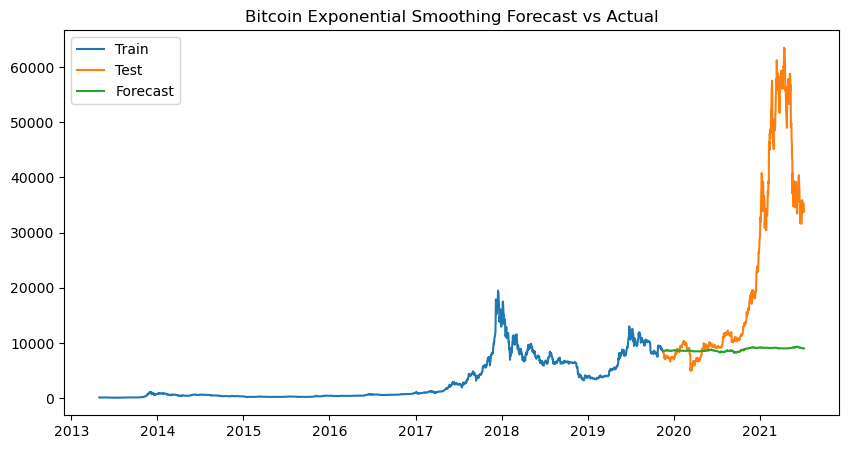

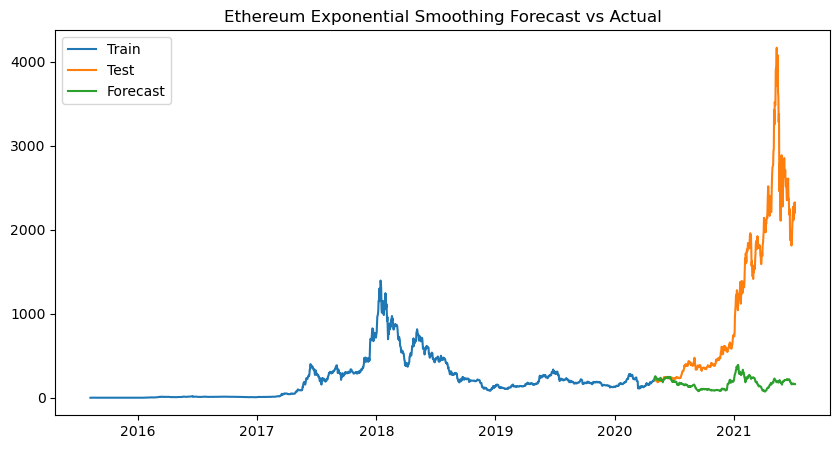

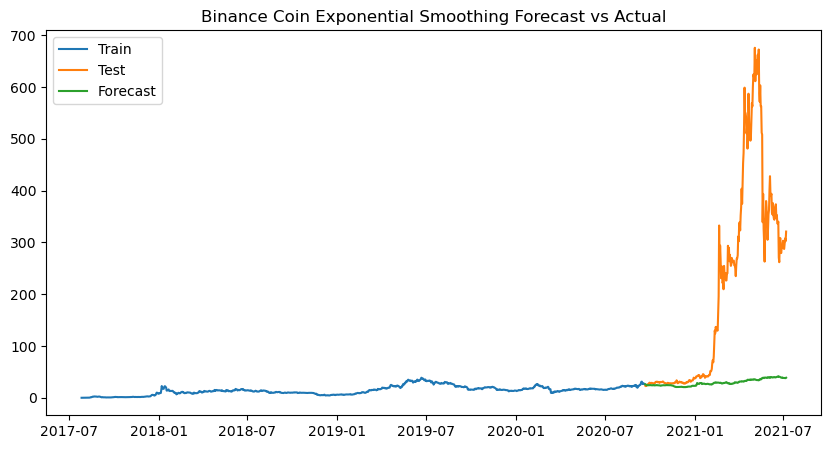

Bitcoin ExponentialSmoothing RMSE: 21451.955459324145
Ethereum ExponentialSmoothing RMSE: 1334.7060780793825
Binance Coin ExponentialSmoothing RMSE: 257.0774931485106


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
# Define a function to apply Exponential Smoothing and calculate RMSE
def exponential_smoothing_forecasting(df, crypto_name):
    # Use the 'Close' column for forecasting
    close_prices = df['Close']
    
    # Splitting the data into training and testing sets (80% train, 20% test)
    train_size = int(len(close_prices) * 0.8)
    train, test = close_prices[:train_size], close_prices[train_size:]
    
    # Fit the Exponential Smoothing model (with trend and seasonality for demonstration)
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
    fitted_model = model.fit()
    
    # Forecasting
    forecast = fitted_model.forecast(steps=len(test))
    
    # Calculate RMSE for the forecast
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    # Plot actual vs forecasted values
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'{crypto_name} Exponential Smoothing Forecast vs Actual')
    plt.legend()
    plt.show()
    
    return rmse

# Apply Exponential Smoothing on Bitcoin, Ethereum, and BinanceCoin
bitcoin_rmse = exponential_smoothing_forecasting(bitcoin_df, "Bitcoin")
ethereum_rmse = exponential_smoothing_forecasting(ethereum_df, "Ethereum")
binancecoin_rmse = exponential_smoothing_forecasting(binancecoin_df, "Binance Coin")

# Display RMSE values
print(f"Bitcoin ExponentialSmoothing RMSE: {bitcoin_rmse}")
print(f"Ethereum ExponentialSmoothing RMSE: {ethereum_rmse}")
print(f"Binance Coin ExponentialSmoothing RMSE: {binancecoin_rmse}")




8. SVM

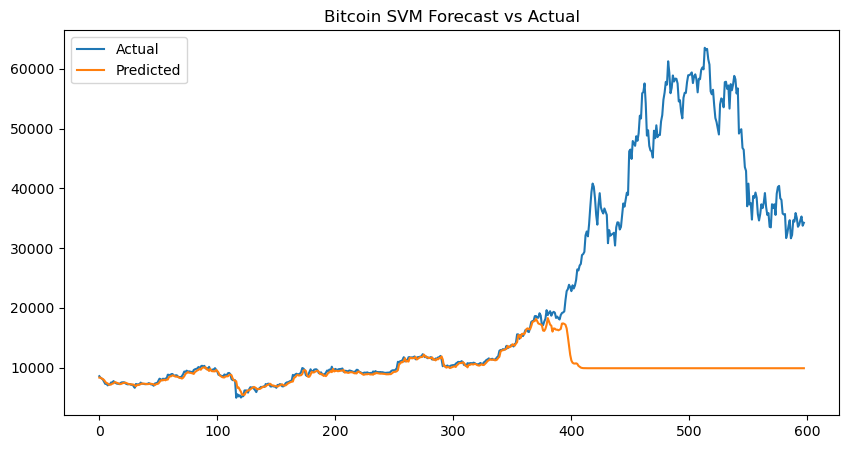

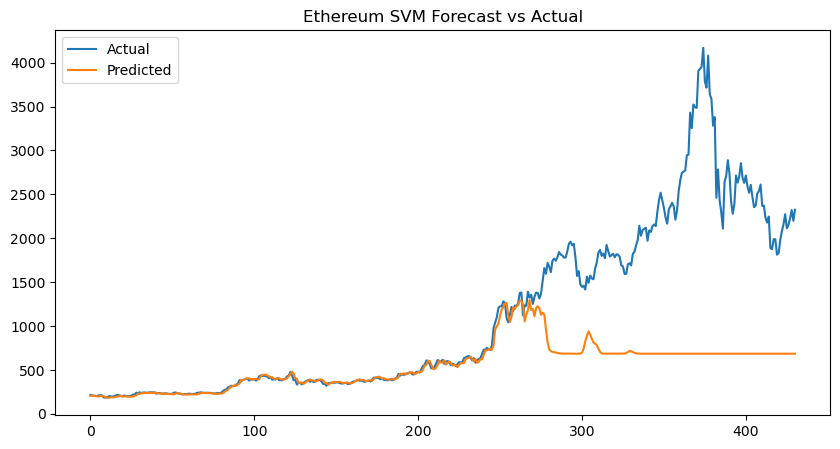

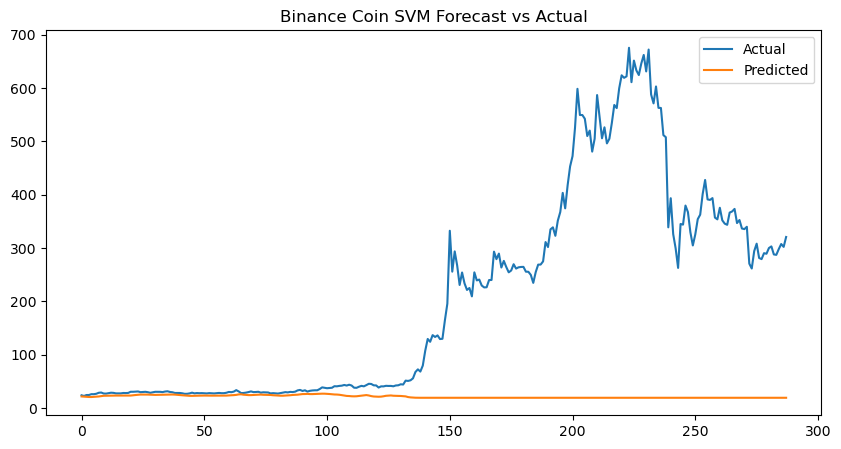

Bitcoin SVM RMSE: 20823.71506481687
Ethereum SVM RMSE: 1005.2607500537778
Binance Coin SVM RMSE: 267.5538291717223


In [31]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define function for SVM regression
def svm_forecasting(df, crypto_name, window_size=5):
    # Use the 'Close' column for forecasting
    close_prices = df['Close'].values.reshape(-1, 1)
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_prices = scaler.fit_transform(close_prices)
    
    # Prepare data for sliding window approach
    X, y = [], []
    for i in range(window_size, len(scaled_prices)):
        X.append(scaled_prices[i-window_size:i, 0])
        y.append(scaled_prices[i, 0])
    X, y = np.array(X), np.array(y)
    
    # Train-test split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Fit SVM model
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    
    # Predict and invert scaling
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'{crypto_name} SVM Forecast vs Actual')
    plt.legend()
    plt.show()
    
    return rmse

# Apply SVM on Bitcoin, Ethereum, and BinanceCoin
bitcoin_rmse_svm = svm_forecasting(bitcoin_df, "Bitcoin")
ethereum_rmse_svm = svm_forecasting(ethereum_df, "Ethereum")
binancecoin_rmse_svm = svm_forecasting(binancecoin_df, "Binance Coin")

# Display RMSE values
print(f"Bitcoin SVM RMSE: {bitcoin_rmse_svm}")
print(f"Ethereum SVM RMSE: {ethereum_rmse_svm}")
print(f"Binance Coin SVM RMSE: {binancecoin_rmse_svm}")


9.Random Forest

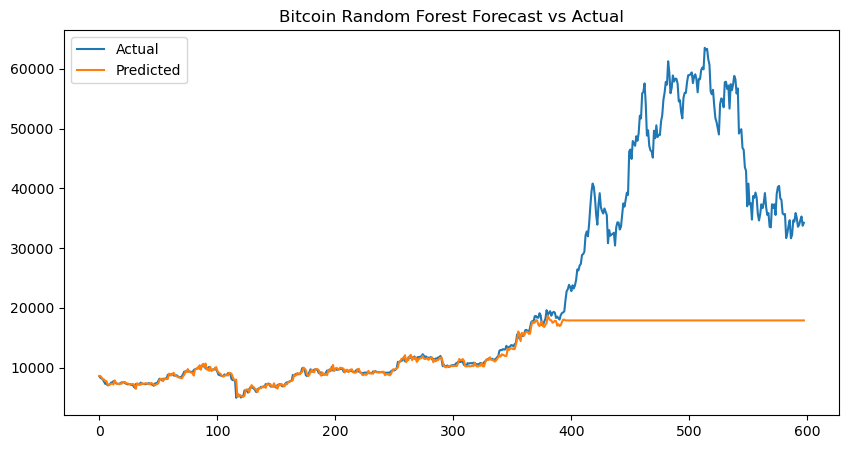

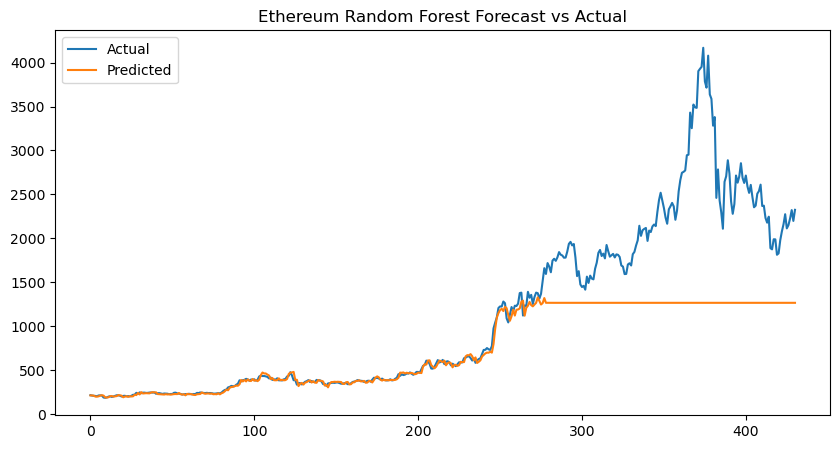

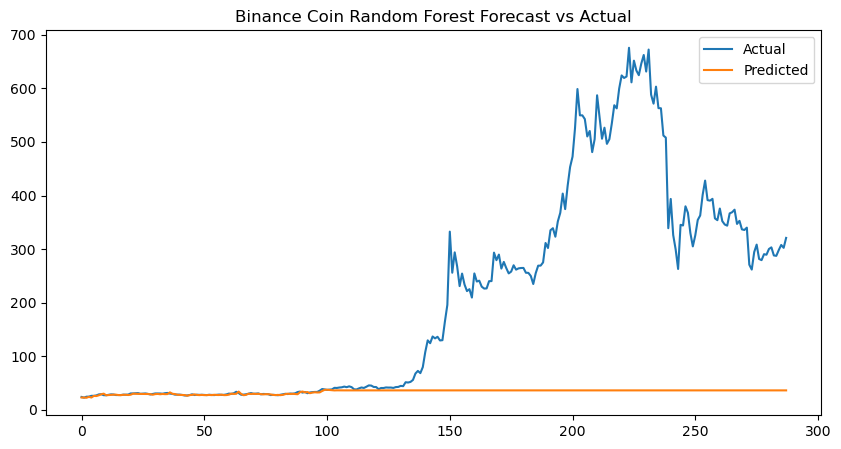

Bitcoin Random Forest RMSE: 16488.354317829497
Ethereum Random Forest RMSE: 697.4182782758351
Binance Coin Random Forest RMSE: 256.2097934994319


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define function for Random Forest forecasting
def random_forest_forecasting(df, crypto_name, window_size=5):
    # Use the 'Close' column for forecasting
    close_prices = df['Close'].values.reshape(-1, 1)
    
    # Prepare data for sliding window approach
    X, y = [], []
    for i in range(window_size, len(close_prices)):
        X.append(close_prices[i-window_size:i, 0])
        y.append(close_prices[i, 0])
    X, y = np.array(X), np.array(y)
    
    # Train-test split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Fit Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'{crypto_name} Random Forest Forecast vs Actual')
    plt.legend()
    plt.show()
    
    return rmse

# Apply Random Forest on Bitcoin, Ethereum, and BinanceCoin
bitcoin_rmse_rf = random_forest_forecasting(bitcoin_df, "Bitcoin")
ethereum_rmse_rf = random_forest_forecasting(ethereum_df, "Ethereum")
binancecoin_rmse_rf = random_forest_forecasting(binancecoin_df, "Binance Coin")

# Display RMSE values
print(f"Bitcoin Random Forest RMSE: {bitcoin_rmse_rf}")
print(f"Ethereum Random Forest RMSE: {ethereum_rmse_rf}")
print(f"Binance Coin Random Forest RMSE: {binancecoin_rmse_rf}")


10. Conclusion and Comparison:

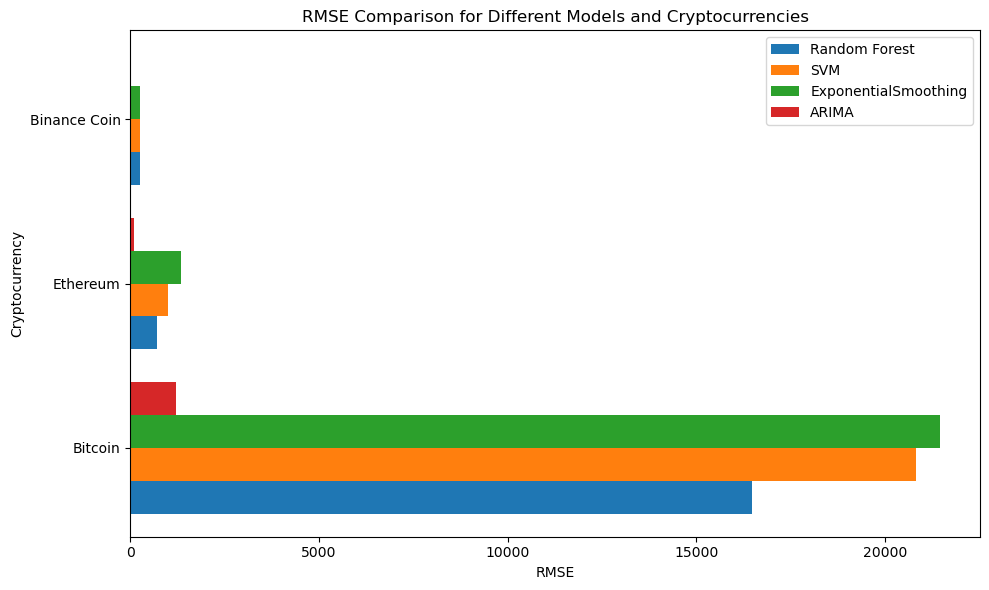

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
cryptos = ['Bitcoin', 'Ethereum', 'Binance Coin']
models = ['Random Forest', 'SVM', 'ExponentialSmoothing', 'ARIMA']
rmse_values = {
    'Random Forest': [16488.35, 697.42, 256.21],
    'SVM': [20823.72, 1005.26, 267.55],
    'ExponentialSmoothing': [21451.96, 1334.71, 257.08],
    'ARIMA': [1216.82, 101.42, 24.30]
}

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set position for each model's bars
y_pos = np.arange(len(cryptos))

# Plotting the bars for each model
for i, model in enumerate(models):
    ax.barh(y_pos + i * 0.2, rmse_values[model], height=0.2, label=model)

ax.set_yticks(y_pos + 0.3)  # Adjust y-ticks to be in the center
ax.set_yticklabels(cryptos)  # Set x labels to be cryptocurrencies
ax.set_xlabel('RMSE')  # Label for x-axis (now RMSE)
ax.set_ylabel('Cryptocurrency')  # Label for y-axis (now Cryptocurrencies)
ax.set_title('RMSE Comparison for Different Models and Cryptocurrencies')
ax.legend()

plt.tight_layout()
plt.show()


ARIMA consistently provides the best results for all cryptocurrencies.
Random Forest is the second-best model, especially for Bitcoin.
SVM and Exponential Smoothing have higher RMSE values and are less effective than ARIMA.


Recommendation

ARIMA is the best model for forecasting cryptocurrency prices.
Random Forest can be useful for more complex datasets, especially for Bitcoin.